**Importing all the necessary python packages**

Refer to [pycaret documentation](https://pycaret.readthedocs.io/en/latest/index.html) for help with installing pycaret.

In [1]:
import pycaret
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the datasets**

air_wt_real_ug (per thermocycle in micrograms) = fuel_wt &times; instantaneous air:fuel ratio 

In [6]:
train = pd.read_csv('datasets/train.csv', usecols = ['air_wt_real_ug', 'SMAP', 'RPM', 
                                                    'CHT_K', 'MAT_K', 'TPS'])
# test = pd.read_csv('n282_data3/11_preprocess_4.csv', 
#                   usecols = ['air_wt_real_ug', 'air_wt_SMAP_ug', 'SMAP', 'RPM', 'CHT_K', 'MAT_K', 'TPS'])
# train = train.drop(columns=['air_wt_SMAP_ug', 'SMAP', 'RPM', 'CHT_K', 'MAT_K', 'TPS'])

**Plotting the independent and dependent variables to look at their distribution**

<AxesSubplot:xlabel='MAT_K', ylabel='Probability'>

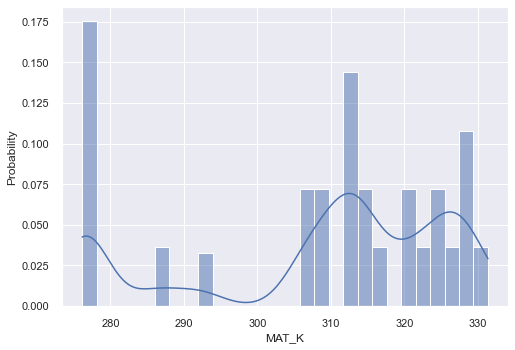

In [10]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = 'MAT_K', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='CHT_K', ylabel='Probability'>

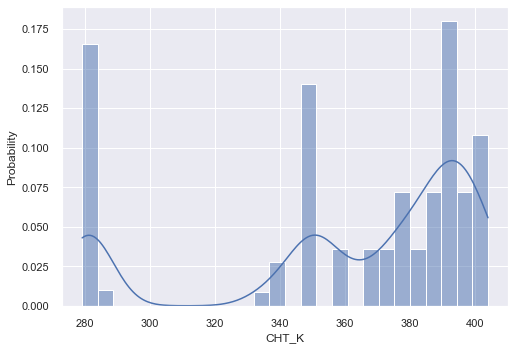

In [11]:
sns.histplot(data = train, x = 'CHT_K', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='RPM', ylabel='Probability'>

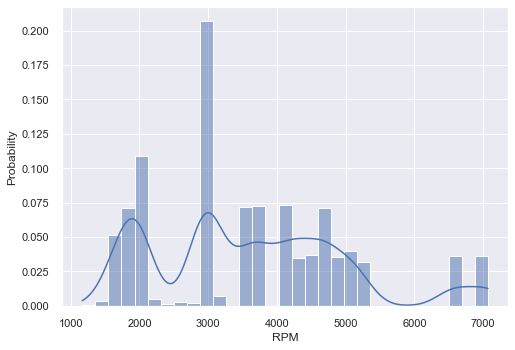

In [12]:
sns.histplot(data = train, x = 'RPM', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='SMAP', ylabel='Probability'>

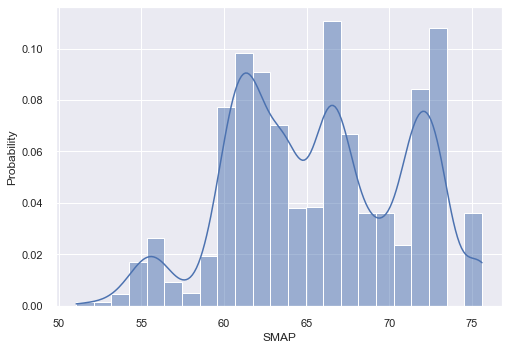

In [13]:
sns.histplot(data = train, x = 'SMAP', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='air_wt_real_ug', ylabel='Probability'>

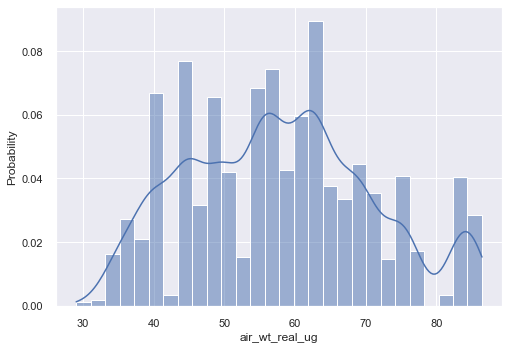

In [14]:
sns.histplot(data = train, x = 'air_wt_real_ug', stat = 'probability', kde = 1)

<AxesSubplot:xlabel='TPS', ylabel='Probability'>

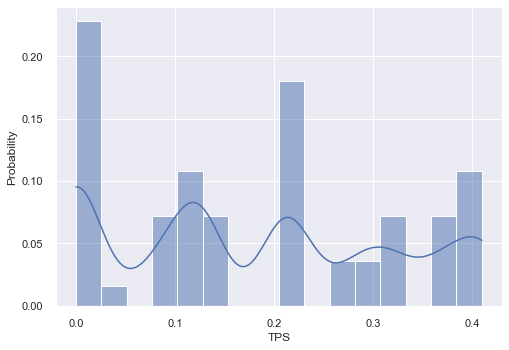

In [15]:
sns.histplot(data = train, x = 'TPS', stat = 'probability', kde = 1)

**Importing the data to a pycaret regression setup**

Looking at the histogram of the independent variables, min-max normalization is chosen instead of z-score because the variables don't appear to be normally distributed.

In [5]:
exp_reg101 = setup(data = train, target = 'air_wt_real_ug',  normalize = True, fold =3, normalize_method = "minmax", 
                   session_id=123)

**Comparing different types of regression models**

compare_models() fits the following regression models to the dataset and compares them in the table below

In [5]:
compare_models(sort = 'MSE')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

**Testing a linear model for air_wt_real_ug**

air_wt_real_ug = &zeta; + &alpha; &times; SMAP + &beta; &times; RPM + &gamma; &times; CHT + &delta; &times; MAT + &eta; &times; TPS + &epsilon;

This is a 6-parameter 5-variable model. This does have an intercept term. 


**Setting arguments for training the model**

fold_number is chosen to be 3 to ensure that all the different operating conditions (around 30) are present in all the combinations of test:train split. Higher values of fold number result in splits such that the testing set during cross-validation consists replications of just a few operating conditons. This leads to negative values for R<sup>2</sup> because the model does worse than the horizontal line passing through the mean of the dataset. Play around with fold_number to observe this. 

Increasing the fold_number also makes the R<sup>2</sup> even more dependent on the particular combination of test:train splits signified by the session_id. Play around with the session_id to observe the high variance in R<sup>2</sup> value corresponding to a high fold_number. Instead, decreasing the fold nummber decreases the sensitivity of R<sup>2</sup> on session_id helping us understand the general properties of the model and variables included instead of the dependence on split combination.

_observe the change in R<sup>2</sup> in the table below by changing session_id and fold_number in code block 6_

In [6]:
lr = create_model('lr')
print(lr.coef_)
print(lr.intercept_)

[51.759586 13.346981]
22.526157


**Leverage and influence:**

Leverage vs studentised residuals plot is available under the interactive residuals tab.

Cook's distance plot can be used to understand the influence of plots. 

In [8]:
evaluate_model(lr, use_train_data=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [9]:
best = create_model('ridge')
print(best.coef_)
print(best.intercept_)
print(best.get_params)

[ 53.538    -21.761576 -13.694485 -13.674923  32.091656]
37.387688
<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)>


In [14]:
tuned_best = tune_model(best, optimize = 'MSE')
print(tuned_best.coef_)
print(tuned_best.intercept_)
print(tuned_best.get_params)

[ 45.73604  -15.114251 -14.487076 -12.359896  31.758728]
39.149273
<bound method BaseEstimator.get_params of Ridge(alpha=7.73, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)>


In [36]:
predict_model(lr)

SMAP       RPM     CHT_K     MAT_K       TPS  air_wt_real_ug  \
0    0.497798  0.269339  0.160192  0.054299  0.195122       56.940132   
1    0.513237  0.265311  0.160192  0.054299  0.195122       57.222317   
2    0.505445  0.265041  0.160192  0.054299  0.195122       57.587864   
3    0.503993  0.265679  0.160192  0.054299  0.195122       56.740479   
4    0.500314  0.269666  0.160192  0.054299  0.195122       62.277447   
..        ...       ...       ...       ...       ...             ...   
195  0.517545  0.337171  0.184221  0.054299  0.243902       56.846535   
196  0.508156  0.341233  0.184221  0.054299  0.243902       59.766266   
197  0.515561  0.343756  0.184221  0.054299  0.243902       59.848560   
198  0.503848  0.348902  0.184221  0.054299  0.243902       59.986210   
199  0.505397  0.354343  0.184221  0.054299  0.243902       56.019863   

         Label  
0    62.819347  
1    63.820351  
2    63.364620  
3    63.264919  
4    62.961388  
..         ...  
195  63.605450  
196  62.962055  
197  63.346428  
198  62.542160  
199  62.516994  

[200 rows x 7 columns]